In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


df = pd.read_excel('uber_deliveryServiceDataset-orig.xlsx')
df.head()

,Date,Hour,Requests,Completes,Supply Hours,Time On Trip,pETA,aETA,Delivered Products,Total Products Available
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,103,159
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,4,8
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,5,9
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,288,414
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,7,65


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      90 non-null     datetime64[ns]
 1   Hour                      90 non-null     int64         
 2   Requests                  90 non-null     int64         
 3   Completes                 90 non-null     int64         
 4   Supply Hours              90 non-null     float64       
 5   Time On Trip              90 non-null     float64       
 6   pETA                      90 non-null     float64       
 7   aETA                      90 non-null     float64       
 8   Delivered Products        90 non-null     int64         
 9   Total Products Available  90 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 7.2 KB


In [89]:
# Adding Weekday Column
df['Weekday'] =  df['Date'].dt.day_name()

In [90]:
df.head(9)

,Date,Hour,Requests,Completes,Supply Hours,Time On Trip,pETA,aETA,Delivered Products,Total Products Available,Weekday
0,2013-09-01,11,79,55,42.63,20.43,5.51,7.19,103,159,Sunday
1,2013-09-01,12,73,41,36.43,15.53,5.48,8.48,4,8,Sunday
2,2013-09-01,13,54,50,23.02,17.76,5.07,8.94,5,9,Sunday
3,2013-09-02,11,193,170,64.20,31.47,5.31,6.55,288,414,Monday
4,2013-09-02,12,258,210,80.28,38.68,4.94,6.08,7,65,Monday
5,2013-09-02,13,153,107,59.18,23.37,5.14,6.42,6,9,Monday
6,2013-09-03,11,124,34,30.67,19.65,6.70,8.19,67,129,Tuesday
7,2013-09-03,12,78,34,27.02,14.38,6.36,8.01,1,12,Tuesday
8,2013-09-03,13,36,15,20.82,12.62,7.82,9.05,4,5,Tuesday


In [91]:
df.describe()

,Hour,Requests,Completes,Supply Hours,Time On Trip,pETA,aETA,Delivered Products,Total Products Available
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000
mean,12.000000,233.522222,149.833333,52.807111,29.051333,5.758556,7.19900,120.600000,183.311111
std,0.821071,143.055833,105.484889,22.480067,14.343199,1.079037,1.23975,169.428172,229.506733
min,11.000000,15.000000,6.000000,11.250000,9.050000,2.430000,4.61000,1.000000,2.000000
25%,11.000000,91.250000,50.000000,32.417500,16.025000,5.085000,6.38250,5.000000,9.000000
50%,12.000000,233.000000,138.000000,52.570000,27.495000,5.725000,7.06500,44.500000,105.500000
75%,13.000000,327.750000,238.000000,67.135000,39.055000,6.475000,8.04750,144.750000,270.000000
max,13.000000,558.000000,420.000000,118.930000,73.620000,8.050000,12.06000,719.000000,984.000000


In [92]:
#Insights
#What is the average Time On Trip for this month?
ave_time_on_trip = df.groupby('Date').sum()[['Time On Trip']]
ave_time_on_trip.mean()

Time On Trip    87.154
dtype: float64

In [93]:
#What is the days with the most requests?
#Showing top 5 of the most request
most_requests = df.groupby('Date').mean()[['Requests']].sort_values(by=['Requests'], ascending=False)
most_requests.head(5)

,Requests
Date,
2013-09-07,477.333333
2013-09-20,409.000000
2013-09-21,393.000000
2013-09-22,353.333333
2013-09-19,347.666667


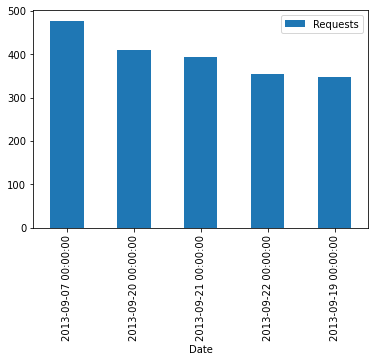

In [138]:
most_requests_plot = most_requests.head(5).plot.bar()

In [127]:
#Which day of week was the busiest (in terms of requests)?
busiest_day_sum = df.groupby('Weekday').sum()[['Requests']].sort_values(by=['Requests'], ascending=True)
busiest_day_ave = df.groupby('Weekday').mean()[['Requests']].sort_values(by=['Requests'], ascending=False)
busiest_day_sum
busiest_day_ave

,Requests
Weekday,
Saturday,372.250000
Friday,326.000000
Sunday,275.733333
Monday,250.733333
Thursday,243.333333
Wednesday,94.000000
Tuesday,57.750000


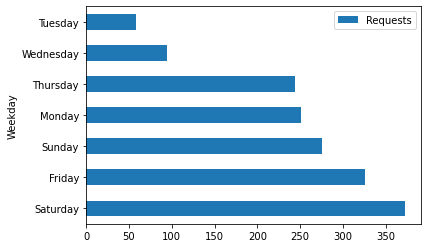

In [136]:
busiest_day_ave_plot = busiest_day_ave.plot.barh()

In [135]:
#Which hour has the most requests?
hour_requests = df.groupby(['Hour']).mean()[['Requests']].sort_values(by=['Requests'], ascending=False)
hour_requests

,Requests
Hour,
12,284.333333
13,215.966667
11,200.266667


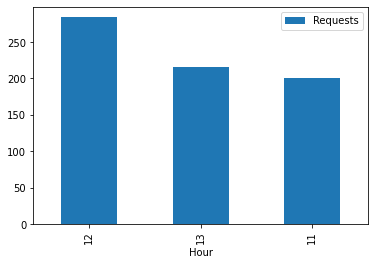

In [137]:
hour_requests_plot = hour_requests.plot.bar()